In [1]:
import random
import string
from typing import TypedDict
from langgraph.graph import StateGraph, END
from langgraph.graph import StateGraph

from langchain_core.tools import tool
from langchain_core.messages import HumanMessage, ToolMessage
from langchain_ollama.chat_models import ChatOllama
from langchain_core.messages import HumanMessage
from tqdm import tqdm
import time, re

llm = ChatOllama(
    model="llama3.1:latest",
    temperature=0.0,
    base_url="http://localhost:11434",
    api_key="ollama"
)

In [4]:
from typing import Optional

class CounterState(TypedDict):
    number_counter: Optional[str] 
    random_letter: Optional[str]

In [33]:
cstate_1: CounterState = {
    "number_counter": 0,  # Start with 0, will be incremented to 1 on first run
    "random_letter": "x",
}
print(f"cstate_1: {cstate_1}")

cstate_1: {'number_counter': 0, 'random_letter': 'x'}


In [ ]:
import random
import string

def increment_node(state):
    print(f"Before increment: {state}")
    
    # Initialize counter if it doesn't exist or increment it
    if 'number_counter' not in state or state['number_counter'] is None:
        state['number_counter'] = 1
    else:
        state['number_counter'] += 1

    print(f"Incremented number_counter: {state['number_counter']}")

    # Generate a random letter and store it in state
    state['random_letter'] = random.choice(string.ascii_letters)
    print(f"Generated random letter: {state['random_letter']}")
    
    return state

In [ ]:
def print_state(state):
    print(f"Current state: {state}")
    return state

In [15]:
print_state(cstate_1)

Current state: {'number_counter': 2, 'random_letter': 'B'}


In [ ]:
def stop_condition(state):
    # Check if the number_counter is greater than 5
    counter = state.get('number_counter', 0)
    print(f"Checking stop condition: counter = {counter}")
    
    if counter > 5:
        print("Stopping: counter > 5")
        return "end"
    else:
        print("Continuing: counter <= 5")
        return "continue"

In [26]:
from langgraph.graph import StateGraph
from langgraph.graph import END

# Create an instance of StateGraph with the GraphState structure
workflow = StateGraph(CounterState)
workflow

In [27]:
workflow.add_node("IncrementNode", increment_node)
workflow.add_node("PrintNode", print_state)     

In [28]:
workflow.add_edge("IncrementNode", "PrintNode")

In [ ]:
workflow.add_conditional_edges("PrintNode", stop_condition, {"continue": "IncrementNode", "end": END})


In [34]:
workflow.set_entry_point("IncrementNode")
app = workflow.compile()

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


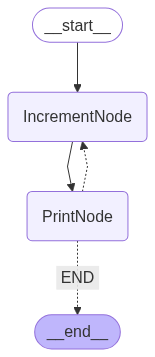

In [31]:
app

In [32]:
input_state = cstate_1
result = app.invoke(input_state)
print(result)

Current state: {'number_counter': 2, 'random_letter': 'B'}


KeyError: False

In [ ]:
# Create a fresh workflow
workflow_new = StateGraph(CounterState)

# Add nodes
workflow_new.add_node("IncrementNode", increment_node)
workflow_new.add_node("PrintNode", print_state)

# Add edges
workflow_new.add_edge("IncrementNode", "PrintNode")
workflow_new.add_conditional_edges("PrintNode", stop_condition, {"continue": "IncrementNode", "end": END})

# Set entry point and compile
workflow_new.set_entry_point("IncrementNode")
app_new = workflow_new.compile()

print("New workflow compiled successfully!")